In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [15]:
analysis = scripts.Analysis()

In [16]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          '4e-21_5.43e-20_3.09e-19_1.76e-18_1e-17__ng_5',
                          'wgt_1_.8_.7_.6_.5',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [17]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'n2o',
                               'band07_wn_1215_1380',
                               'P_50_T_250',
                               '4e-21_5.43e-20_3.09e-19_1.76e-18_1e-17__ng_5',
                               'wgt_1_.8_.7_.6_.5',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [18]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [19]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [20]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [21]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [22]:
fig.display_hrefanchor()

In [23]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [24]:
table_dgdgs.display_hrefanchor()

In [25]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

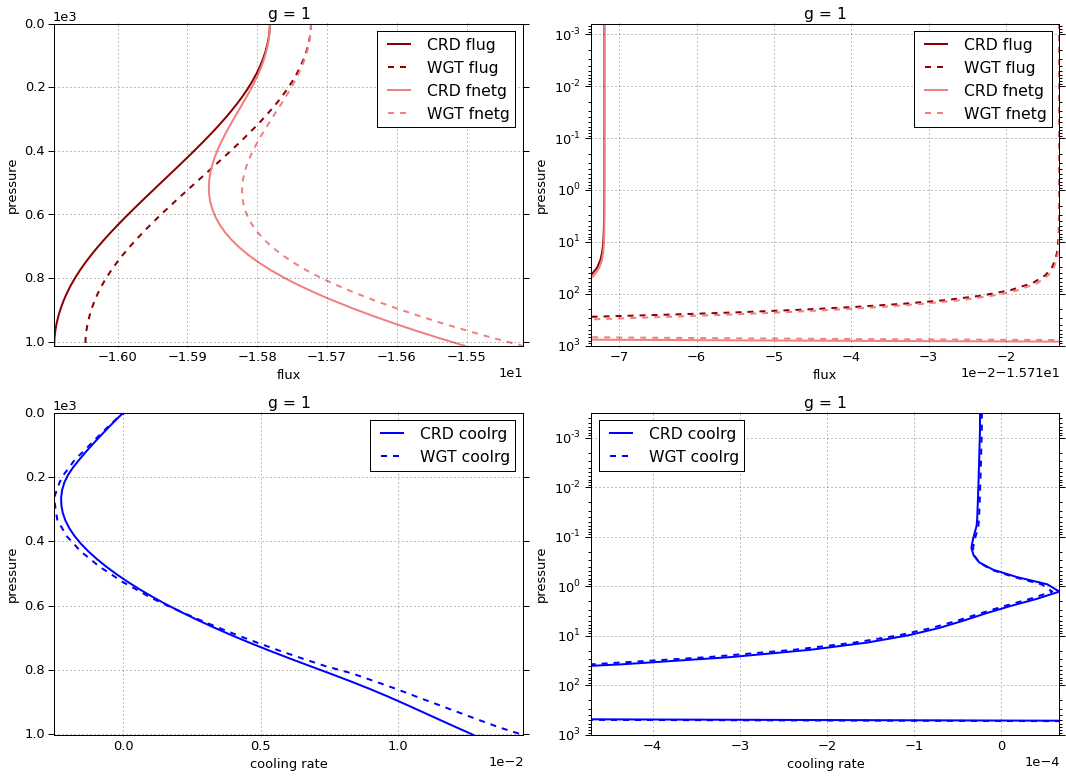

# Figure: flux, cooling rate. g-group 2

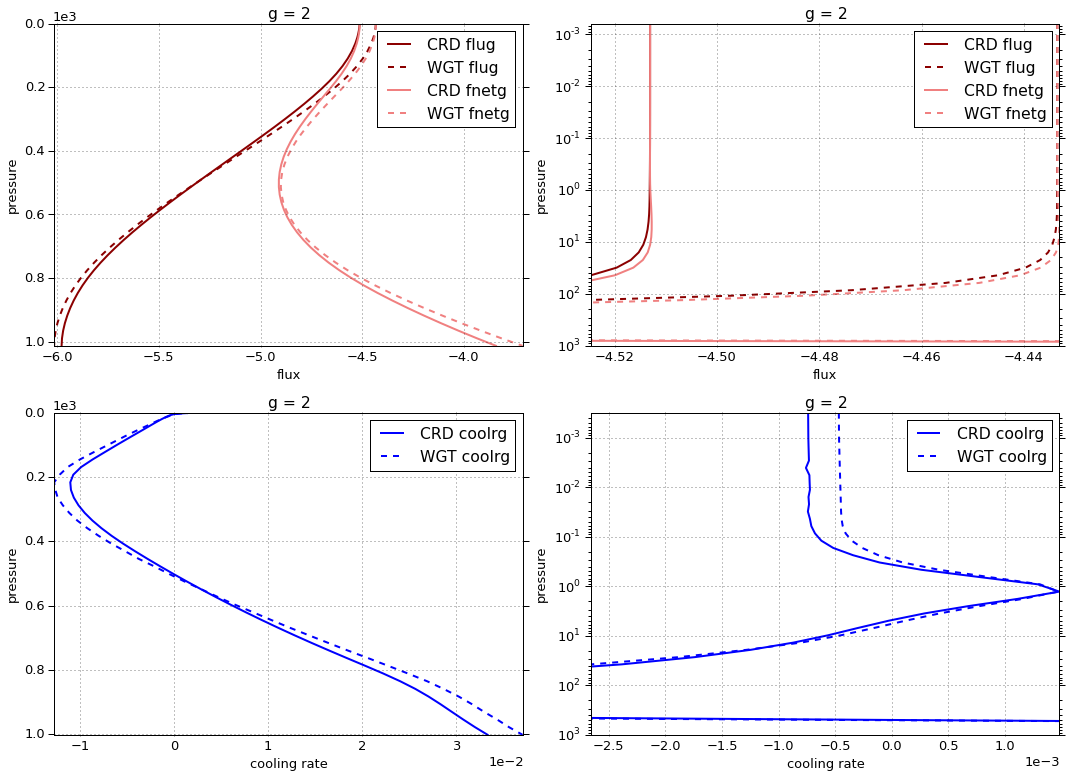

# Figure: flux, cooling rate. g-group 3

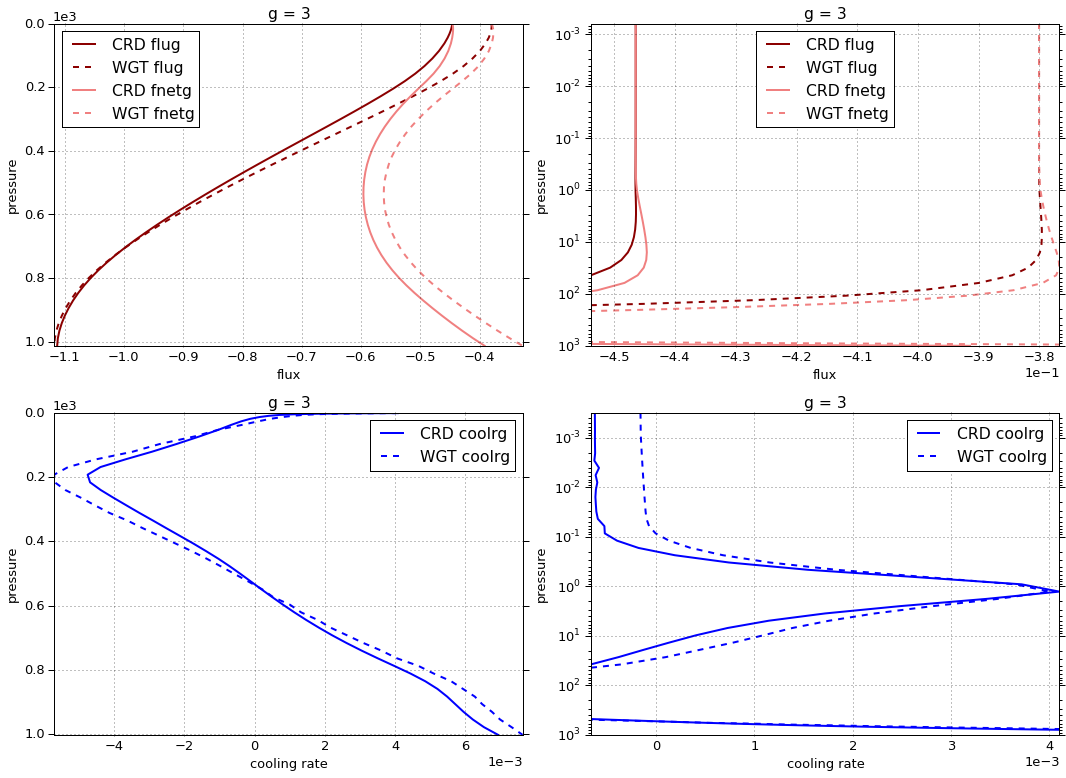

# Figure: flux, cooling rate. g-group 4

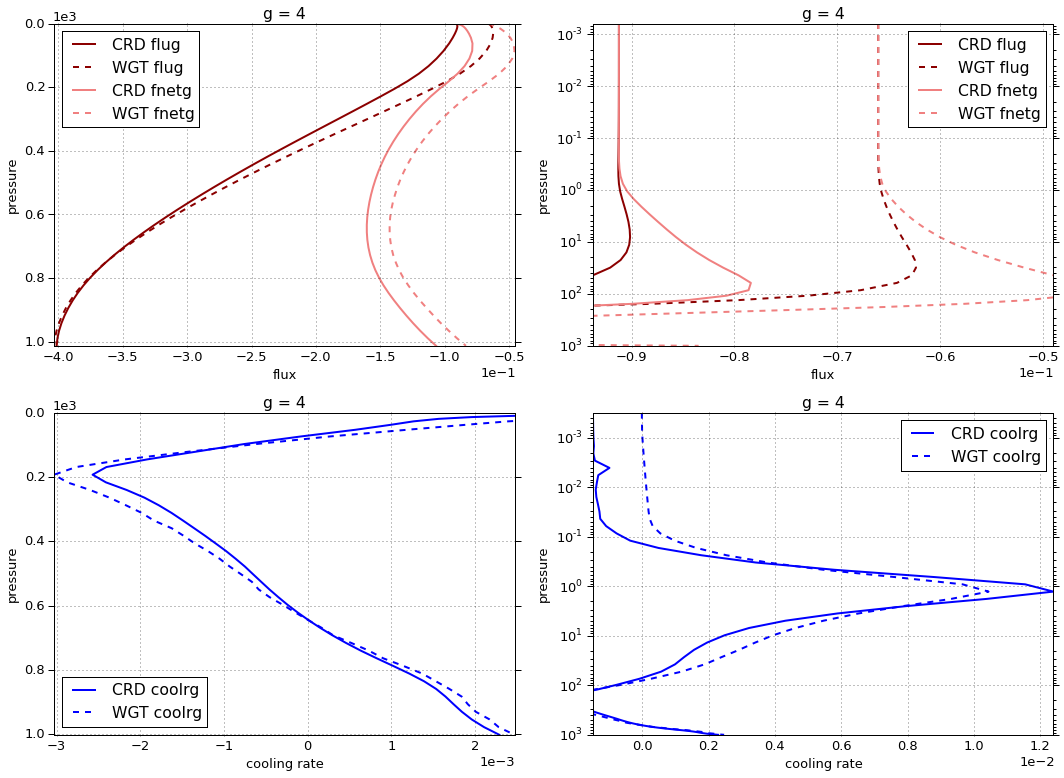

# Figure: flux, cooling rate. g-group 5

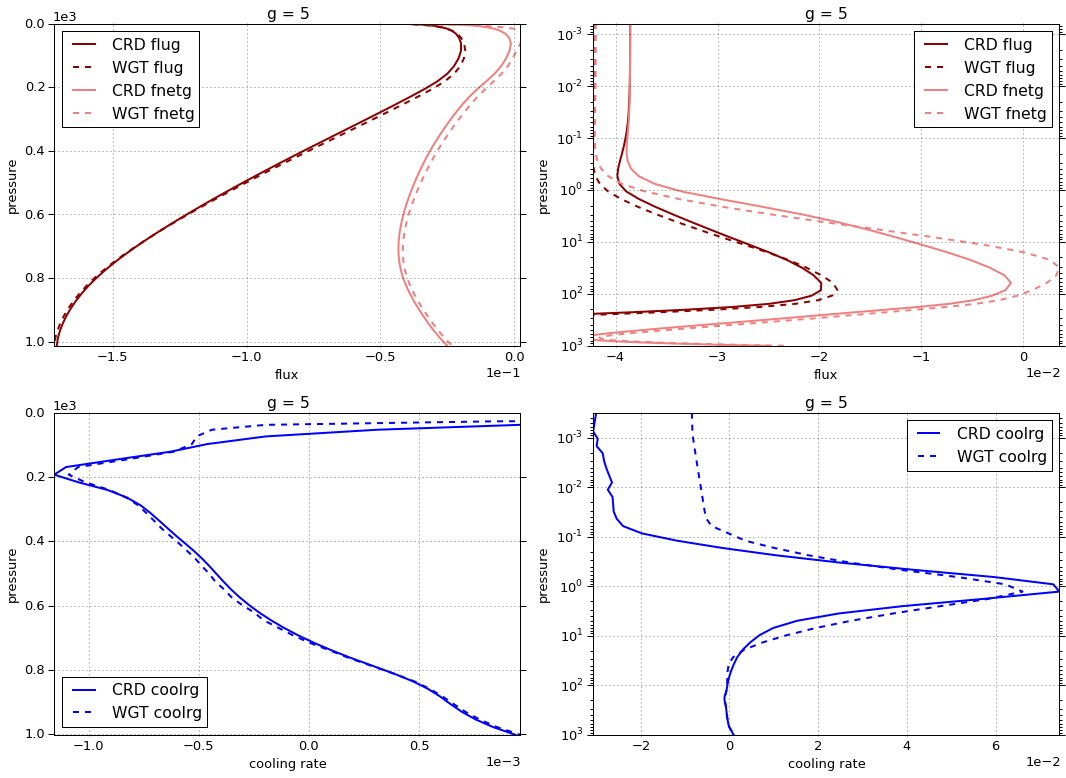

# Figure: flux, cooling rate. g-group total

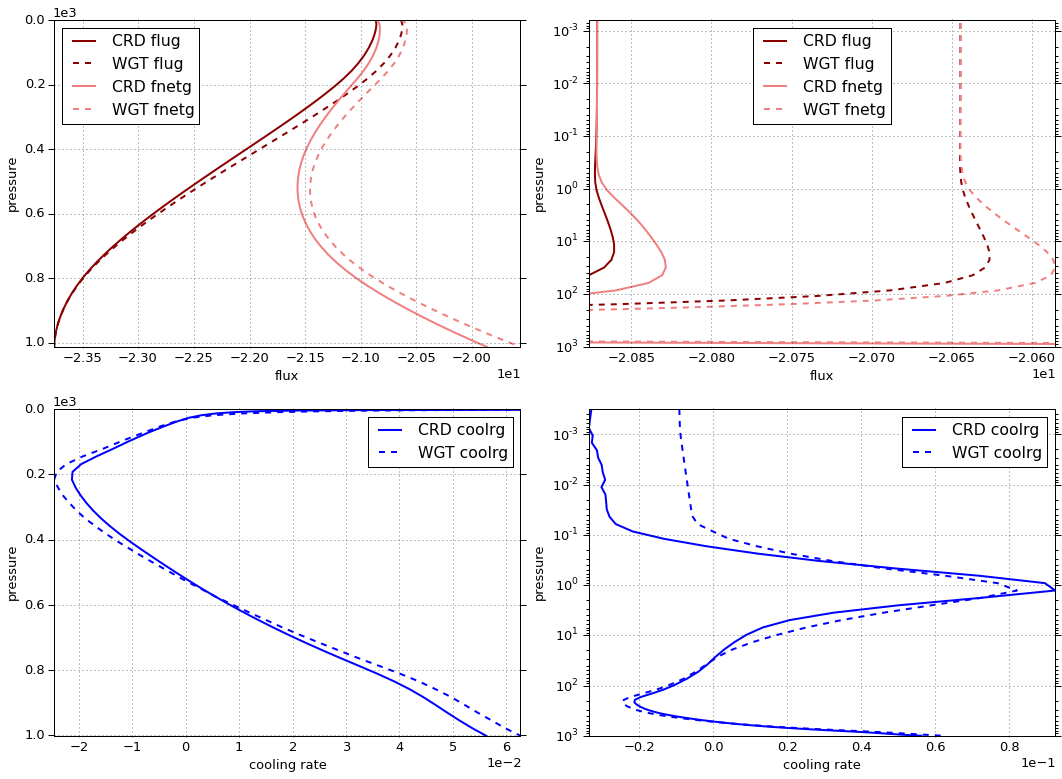

In [26]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [27]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.781963  0.000000 -15.781963
  1013     76    -16.090938  0.588028 -15.502910
2 0        1      -4.513059  0.000000  -4.513059
  1013     76     -5.979005  2.136721  -3.842284
3 0        1      -0.446487  0.000000  -0.446487
  1013     76     -1.112899  0.721452  -0.391448
4 0        1      -0.091224  0.000000  -0.091224
  1013     76     -0.401393  0.294736  -0.106657
5 0        1      -0.038596  0.000000  -0.038596
  1013     76     -0.170935  0.145951  -0.024984


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.723096  0.000000 -15.723096
  1013     76    -16.046320  0.626262 -15.420058
2 0        1      -4.433499  0.000000  -4.433499
  1013     76     -6.015587  2.304140  -3.711447
3 0        1      -0.380073  0.000000  -0.380073
  1013     76     -1.117997  0.790562  -0.327435
4 0        1      -0.066018  0.000000  -0.066018
  1013     76     -0.403356  0.319879  -0.083477
5 0        1      -0.042022  0.000000  -0.042022
  1013     76     -0.171910  0.148754  -0.023156


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.058867  0.000000  0.058867
  1013     76     0.044618  0.038234  0.082852
2 0        1      0.079560  0.000000  0.079560
  1013     76    -0.036582  0.167419  0.130837
3 0        1      0.066414  0.000000  0.066414
  1013     76    -0.005098  0.069110  0.064012
4 0        1      0.025206  0.000000  0.025206
  1013     76    -0.001963  0.025143  0.023180
5 0        1     -0.003426  0.000000 -0.003426
  1013     76    -0.000975  0.002803  0.001828

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000024
  1001.112500 75     0.012721
2 0.000312    1     -0.000740
  1001.112500 75     0.033380
3 0.000312    1     -0.000624
  1001.112500 75     0.006931
4 0.000312    1     -0.001483
  1001.112500 75     0.002289
5 0.000312    1     -0.030055
  1001.112500 75     0.000938


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000022
  1001.112500 75     0.014516
2 0.000312    1     -0.000468
  1001.112500 75     0.037100
3 0.000312    1     -0.000159
  1001.112500 75     0.007630
4 0.000312    1     -0.000010
  1001.112500 75     0.002471
5 0.000312    1     -0.008499
  1001.112500 75     0.000959


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1      0.000002
  1001.112500 75     0.001795
2 0.000312    1      0.000271
  1001.112500 75     0.003720
3 0.000312    1      0.000465
  1001.112500 75     0.000699
4 0.000312    1      0.001473
  1001.112500 75     0.000182
5 0.000312    1      0.021556
  1001.112500 75     0.000022

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.871330,0.000000,-20.871330
1013,76,-23.755171,3.886887,-19.868283



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.644709,0.000000,-20.644709
1013,76,-23.755171,4.189597,-19.565573



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,2.266207e-01,0.000000,0.226621
1013,76,-5.000001e-08,0.302709,0.302709


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.032926
1001.112500,75,0.056259



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.009158
1001.112500,75,0.062677



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.023768
1001.112500,75,0.006418


In [28]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.686000,0.675487
2,0.244758,0.253233
3,0.045758,0.047063
4,0.016485,0.016980
5,0.007000,0.007237


In [29]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -15.781963  0.000000e+00 -15.781963   1     1   
0.000624      1     2 -15.781963  2.003504e-10 -15.781963   1     2   
0.000876      1     3 -15.781963  2.826021e-10 -15.781963   1     3   
0.001229      1     4 -15.781963  4.014060e-10 -15.781963   1     4   
0.001723      1     5 -15.781963  5.741030e-10 -15.781963   1     5   
0.002417      1     6 -15.781963  8.251961e-10 -15.781963   1     6   
0.003391      1     7 -15.781963  1.190350e-09 -15.781963   1     7   
0.004757      1     8 -15.781963  1.721467e-09 -15.781963   1     8   
0.006672      1     9 -15.781963  2.494083e-09 -15.781963   1     9   
0.009359      1    10 -15.781963  3.618367e-09 -15.781963   1    10   
0.013128      1    11 -15.781963  5.255029e-09 -15.781963   1    11   
0.018415      1    12 -15.781963  7.638962e-09 -15.781963   1    12   
0.025830      1    13 -15.781963  1.111411e-08 -15.781963   1    13   
0.036232      1    14 -15.781963  1.618716e-08 -15.781963   1    14   
0.050823      1    15 -15.781963  2.368648e-08 -15.781963   1    15   
0.071291      1    16 -15.781963  3.567964e-08 -15.781963   1    16   
0.100000      1    17 -15.781964  5.822270e-08 -15.781963   1    17   
0.140271      1    18 -15.781964  1.057814e-07 -15.781964   1    18   
0.196760      1    19 -15.781964  2.085399e-07 -15.781964   1    19   
0.275997      1    20 -15.781965  4.310448e-07 -15.781964   1    20   
0.387100      1    21 -15.781965  9.126918e-07 -15.781965   1    21   
0.543100      1    22 -15.781967  1.955121e-06 -15.781965   1    22   
0.761700      1    23 -15.781968  4.175870e-06 -15.781964   1    23   
1.068500      1    24 -15.781971  8.476286e-06 -15.781962   1    24   
1.498800      1    25 -15.781974  1.511438e-05 -15.781959   1    25   
2.102400      1    26 -15.781979  2.314455e-05 -15.781956   1    26   
2.949000      1    27 -15.781987  3.241802e-05 -15.781955   1    27   
4.136600      1    28 -15.782001  4.336464e-05 -15.781958   1    28   
5.802500      1    29 -15.782023  5.695675e-05 -15.781966   1    29   
8.139200      1    30 -15.782061  7.490938e-05 -15.781986   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -15.856694  1.667641e-02 -15.840018   1    47   
347.300000    1    48 -15.866811  2.089630e-02 -15.845915   1    48   
371.075000    1    49 -15.877296  2.588300e-02 -15.851413   1    49   
394.850000    1    50 -15.888087  3.169771e-02 -15.856389   1    50   
418.625000    1    51 -15.899117  3.839908e-02 -15.860718   1    51   
442.400000    1    52 -15.910328  4.604007e-02 -15.864288   1    52   
466.175000    1    53 -15.921658  5.466656e-02 -15.866991   1    53   
489.950000    1    54 -15.933054  6.432206e-02 -15.868732   1    54   
513.725000    1    55 -15.944458  7.504653e-02 -15.869411   1    55   
537.500000    1    56 -15.955816  8.687433e-02 -15.868942   1    56   
561.275000    1    57 -15.967071  9.984574e-02 -15.867225   1    57   
585.050000    1    58 -15.978165  1.139959e-01 -15.864169   1    58   
608.825000    1    59 -15.989040  1.293595e-01 -15.859681   1    59   
632.600000    1    60 -15.999636  1.459726e-01 -15.853663   1    60   
656.375000    1    61 -16.009891  1.638637e-01 -15.846027   1    61   
680.150000    1    62 -16.019745  1.830612e-01 -15.836683   1    62   
703.925000    1    63 -16.029136  2.035880e-01 -15.825548   1    63   
727.700000    1    64 -16.038003  2.254694e-01 -15.812533   1    64   
751.475000    1    65 -16.046283  2.487245e-01 -15.797558   1    65   
775.250000    1    66 -16.053920  2.733716e-01 -15.780549   1    66   
799.025000    1    67 -16.060863  2.994112e-01 -15.761452   1    67   
822.800000    1    68 -16.067076  3.268266e-01 -15.740249   1    68   
846.575000    1    69 -16.072547  3.

In [30]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -4.513059  0.000000e+00 -4.513059   2     1 -4.433499   
0.000624      2     2 -4.513059  7.880482e-09 -4.513059   2     2 -4.433499   
0.000876      2     3 -4.513059  1.110173e-08 -4.513059   2     3 -4.433500   
0.001229      2     4 -4.513059  1.571243e-08 -4.513059   2     4 -4.433500   
0.001723      2     5 -4.513060  2.235067e-08 -4.513060   2     5 -4.433500   
0.002417      2     6 -4.513060  3.190954e-08 -4.513060   2     6 -4.433500   
0.003391      2     7 -4.513060  4.567571e-08 -4.513060   2     7 -4.433500   
0.004757      2     8 -4.513060  6.550194e-08 -4.513060   2     8 -4.433500   
0.006672      2     9 -4.513060  9.405520e-08 -4.513060   2     9 -4.433500   
0.009359      2    10 -4.513060  1.351805e-07 -4.513060   2    10 -4.433500   
0.013128      2    11 -4.513061  1.944179e-07 -4.513061   2    11 -4.433500   
0.018415      2    12 -4.513061  2.797568e-07 -4.513061   2    12 -4.433501   
0.025830      2    13 -4.513062  4.027219e-07 -4.513062   2    13 -4.433501   
0.036232      2    14 -4.513063  5.800070e-07 -4.513063   2    14 -4.433502   
0.050823      2    15 -4.513065  8.384221e-07 -4.513064   2    15 -4.433503   
0.071291      2    16 -4.513067  1.237720e-06 -4.513065   2    16 -4.433504   
0.100000      2    17 -4.513070  1.928156e-06 -4.513068   2    17 -4.433506   
0.140271      2    18 -4.513074  3.226871e-06 -4.513071   2    18 -4.433509   
0.196760      2    19 -4.513080  5.725236e-06 -4.513074   2    19 -4.433512   
0.275997      2    20 -4.513088  1.054719e-05 -4.513078   2    20 -4.433517   
0.387100      2    21 -4.513099  1.986574e-05 -4.513079   2    21 -4.433523   
0.543100      2    22 -4.513112  3.790620e-05 -4.513074   2    22 -4.433530   
0.761700      2    23 -4.513126  7.237265e-05 -4.513054   2    23 -4.433536   
1.068500      2    24 -4.513141  1.334556e-04 -4.513007   2    24 -4.433538   
1.498800      2    25 -4.513157  2.249929e-04 -4.512932   2    25 -4.433538   
2.102400      2    26 -4.513189  3.373067e-04 -4.512852   2    26 -4.433549   
2.949000      2    27 -4.513253  4.683694e-04 -4.512785   2    27 -4.433582   
4.136600      2    28 -4.513366  6.216351e-04 -4.512744   2    28 -4.433654   
5.802500      2    29 -4.513556  8.059251e-04 -4.512750   2    29 -4.433790   
8.139200      2    30 -4.513870  1.037107e-03 -4.512833   2    30 -4.434040   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -4.929194  1.227621e-01 -4.806432   2    47 -4.894341   
347.300000    2    48 -4.979805  1.489522e-01 -4.830853   2    48 -4.950069   
371.075000    2    49 -5.031282  1.787183e-01 -4.852564   2    49 -5.006647   
394.850000    2    50 -5.083348  2.121324e-01 -4.871216   2    50 -5.063733   
418.625000    2    51 -5.135712  2.492142e-01 -4.886498   2    51 -5.121037   
442.400000    2    52 -5.188135  2.899538e-01 -4.898181   2    52 -5.178174   
466.175000    2    53 -5.240411  3.343112e-01 -4.906099   2    53 -5.235143   
489.950000    2    54 -5.292349  3.822197e-01 -4.910130   2    54 -5.291524   
513.725000    2    55 -5.343775  4.335994e-01 -4.910175   2    55 -5.347179   
537.500000    2    56 -5.394509  4.883715e-01 -4.906138   2    56 -5.401907   
561.275000    2    57 -5.444364  5.464649e-01 -4.897899   2    57 -5.455574   
585.050000    2    58 -5.493145  6.078123e-01 -4.885333   2    58 -5.507909   
608.825000    2    59 -5.540655  6.723379e-01 -4.868317   2    59 -5.558686   
632.600000    2    60 -5.586689  7.399796e-01 -4.846709   2    60 -5.607689   
656.375000    2    61 -5.631038  8.106555e-01 -4.820383   2    61 -5.654722   
680.150000    2    62 -5.673484  8.842835e-01 -4.789200   2    62 -5.699607   
703.925000    2    63 -5.713801  9.607793e-01 -4.753022   2   

In [31]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -0.446487  0.000000e+00 -0.446487   3     1 -0.380073   
0.000624      3     2 -0.446487  1.181043e-08 -0.446487   3     2 -0.380073   
0.000876      3     3 -0.446487  1.664930e-08 -0.446487   3     3 -0.380073   
0.001229      3     4 -0.446487  2.360839e-08 -0.446487   3     4 -0.380073   
0.001723      3     5 -0.446487  3.367843e-08 -0.446487   3     5 -0.380073   
0.002417      3     6 -0.446487  4.825183e-08 -0.446487   3     6 -0.380073   
0.003391      3     7 -0.446488  6.934423e-08 -0.446487   3     7 -0.380073   
0.004757      3     8 -0.446488  9.987191e-08 -0.446488   3     8 -0.380073   
0.006672      3     9 -0.446488  1.440525e-07 -0.446488   3     9 -0.380074   
0.009359      3    10 -0.446488  2.079949e-07 -0.446488   3    10 -0.380074   
0.013128      3    11 -0.446488  3.005421e-07 -0.446488   3    11 -0.380074   
0.018415      3    12 -0.446489  4.345047e-07 -0.446489   3    12 -0.380074   
0.025830      3    13 -0.446490  6.284468e-07 -0.446489   3    13 -0.380074   
0.036232      3    14 -0.446491  9.093807e-07 -0.446490   3    14 -0.380074   
0.050823      3    15 -0.446492  1.320956e-06 -0.446491   3    15 -0.380075   
0.071291      3    16 -0.446494  1.966054e-06 -0.446492   3    16 -0.380076   
0.100000      3    17 -0.446497  3.121126e-06 -0.446494   3    17 -0.380076   
0.140271      3    18 -0.446501  5.388470e-06 -0.446496   3    18 -0.380077   
0.196760      3    19 -0.446507  9.907116e-06 -0.446497   3    19 -0.380078   
0.275997      3    20 -0.446514  1.886389e-05 -0.446495   3    20 -0.380078   
0.387100      3    21 -0.446522  3.648582e-05 -0.446485   3    21 -0.380076   
0.543100      3    22 -0.446528  7.092254e-05 -0.446457   3    22 -0.380067   
0.761700      3    23 -0.446525  1.367916e-04 -0.446389   3    23 -0.380044   
1.068500      3    24 -0.446506  2.529086e-04 -0.446253   3    24 -0.379997   
1.498800      3    25 -0.446470  4.260391e-04 -0.446044   3    25 -0.379923   
2.102400      3    26 -0.446441  6.371970e-04 -0.445804   3    26 -0.379839   
2.949000      3    27 -0.446436  8.807646e-04 -0.445555   3    27 -0.379753   
4.136600      3    28 -0.446474  1.160649e-03 -0.445313   3    28 -0.379676   
5.802500      3    29 -0.446577  1.490338e-03 -0.445087   3    29 -0.379618   
8.139200      3    30 -0.446781  1.895316e-03 -0.444885   3    30 -0.379607   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -0.657507  9.771186e-02 -0.559796   3    47 -0.616618   
347.300000    3    48 -0.680929  1.129885e-01 -0.567941   3    48 -0.643280   
371.075000    3    49 -0.704416  1.293996e-01 -0.575017   3    49 -0.670058   
394.850000    3    50 -0.727858  1.468502e-01 -0.581008   3    50 -0.696714   
418.625000    3    51 -0.751149  1.652272e-01 -0.585922   3    51 -0.723152   
442.400000    3    52 -0.774207  1.844007e-01 -0.589806   3    52 -0.749271   
466.175000    3    53 -0.796975  2.042773e-01 -0.592698   3    53 -0.774989   
489.950000    3    54 -0.819407  2.247362e-01 -0.594670   3    54 -0.800277   
513.725000    3    55 -0.841468  2.456897e-01 -0.595778   3    55 -0.825061   
537.500000    3    56 -0.863112  2.670649e-01 -0.596047   3    56 -0.849253   
561.275000    3    57 -0.884299  2.888150e-01 -0.595484   3    57 -0.872843   
585.050000    3    58 -0.904970  3.108981e-01 -0.594072   3    58 -0.895771   
608.825000    3    59 -0.925063  3.332743e-01 -0.591789   3    59 -0.917944   
632.600000    3    60 -0.944513  3.559185e-01 -0.588595   3    60 -0.939301   
656.375000    3    61 -0.963251  3.788052e-01 -0.584446   3    61 -0.959773   
680.150000    3    62 -0.981200  4.019144e-01 -0.579286   3    62 -0.979272   
703.925000    3    63 -0.998273  4.252154e-01 -0.573058   3   

In [32]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.091224  0.000000e+00 -0.091224   4     1 -0.066018   
0.000624      4     2 -0.091224  4.021220e-08 -0.091224   4     2 -0.066018   
0.000876      4     3 -0.091224  5.667747e-08 -0.091224   4     3 -0.066018   
0.001229      4     4 -0.091224  8.032768e-08 -0.091224   4     4 -0.066018   
0.001723      4     5 -0.091225  1.145042e-07 -0.091224   4     5 -0.066018   
0.002417      4     6 -0.091225  1.638959e-07 -0.091225   4     6 -0.066018   
0.003391      4     7 -0.091225  2.352789e-07 -0.091225   4     7 -0.066018   
0.004757      4     8 -0.091225  3.384391e-07 -0.091225   4     8 -0.066018   
0.006672      4     9 -0.091226  4.875012e-07 -0.091225   4     9 -0.066018   
0.009359      4    10 -0.091226  7.028792e-07 -0.091226   4    10 -0.066018   
0.013128      4    11 -0.091227  1.014048e-06 -0.091226   4    11 -0.066019   
0.018415      4    12 -0.091229  1.463586e-06 -0.091227   4    12 -0.066019   
0.025830      4    13 -0.091230  2.112973e-06 -0.091228   4    13 -0.066019   
0.036232      4    14 -0.091233  3.051298e-06 -0.091230   4    14 -0.066019   
0.050823      4    15 -0.091237  4.421888e-06 -0.091232   4    15 -0.066020   
0.071291      4    16 -0.091241  6.556286e-06 -0.091235   4    16 -0.066020   
0.100000      4    17 -0.091248  1.031958e-05 -0.091237   4    17 -0.066021   
0.140271      4    18 -0.091257  1.753677e-05 -0.091239   4    18 -0.066020   
0.196760      4    19 -0.091267  3.154077e-05 -0.091236   4    19 -0.066018   
0.275997      4    20 -0.091278  5.847591e-05 -0.091219   4    20 -0.066011   
0.387100      4    21 -0.091284  1.097555e-04 -0.091174   4    21 -0.065994   
0.543100      4    22 -0.091273  2.063820e-04 -0.091067   4    22 -0.065955   
0.761700      4    23 -0.091223  3.838239e-04 -0.090839   4    23 -0.065875   
1.068500      4    24 -0.091104  6.843174e-04 -0.090419   4    24 -0.065726   
1.498800      4    25 -0.090909  1.121093e-03 -0.089788   4    25 -0.065499   
2.102400      4    26 -0.090688  1.643705e-03 -0.089045   4    26 -0.065220   
2.949000      4    27 -0.090478  2.230655e-03 -0.088247   4    27 -0.064900   
4.136600      4    28 -0.090299  2.880320e-03 -0.087419   4    28 -0.064543   
5.802500      4    29 -0.090178  3.611310e-03 -0.086567   4    29 -0.064148   
8.139200      4    30 -0.090140  4.466171e-03 -0.085674   4    30 -0.063722   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.193900  6.196736e-02 -0.131933   4    47 -0.172801   
347.300000    4    48 -0.205043  6.891419e-02 -0.136128   4    48 -0.185646   
371.075000    4    49 -0.216111  7.616149e-02 -0.139949   4    49 -0.198273   
394.850000    4    50 -0.227064  8.366597e-02 -0.143398   4    50 -0.210821   
418.625000    4    51 -0.237864  9.137255e-02 -0.146491   4    51 -0.223172   
442.400000    4    52 -0.248479  9.924528e-02 -0.149234   4    52 -0.235284   
466.175000    4    53 -0.258893  1.072369e-01 -0.151656   4    53 -0.247155   
489.950000    4    54 -0.269097  1.153249e-01 -0.153772   4    54 -0.258777   
513.725000    4    55 -0.279086  1.234711e-01 -0.155615   4    55 -0.270103   
537.500000    4    56 -0.288857  1.316742e-01 -0.157182   4    56 -0.281129   
561.275000    4    57 -0.298391  1.399204e-01 -0.158471   4    57 -0.291887   
585.050000    4    58 -0.307676  1.482141e-01 -0.159462   4    58 -0.302307   
608.825000    4    59 -0.316688  1.565458e-01 -0.160143   4    59 -0.312400   
632.600000    4    60 -0.325406  1.649203e-01 -0.160486   4    60 -0.322050   
656.375000    4    61 -0.333802  1.733386e-01 -0.160464   4    61 -0.331319   
680.150000    4    62 -0.341845  1.817929e-01 -0.160052   4    62 -0.340155   
703.925000    4    63 -0.349498  1.902794e-01 -0.159219   4   

In [33]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      5     1 -0.038596  0.000000e+00 -0.038596   5     1 -0.042022   
0.000624      5     2 -0.038599  8.076523e-07 -0.038598   5     2 -0.042023   
0.000876      5     3 -0.038600  1.137017e-06 -0.038599   5     3 -0.042023   
0.001229      5     4 -0.038602  1.606467e-06 -0.038600   5     4 -0.042024   
0.001723      5     5 -0.038604  2.279251e-06 -0.038602   5     5 -0.042025   
0.002417      5     6 -0.038608  3.243307e-06 -0.038604   5     6 -0.042026   
0.003391      5     7 -0.038612  4.624383e-06 -0.038608   5     7 -0.042027   
0.004757      5     8 -0.038619  6.601951e-06 -0.038612   5     8 -0.042030   
0.006672      5     9 -0.038628  9.431600e-06 -0.038618   5     9 -0.042033   
0.009359      5    10 -0.038640  1.347697e-05 -0.038627   5    10 -0.042037   
0.013128      5    11 -0.038658  1.925326e-05 -0.038639   5    11 -0.042043   
0.018415      5    12 -0.038683  2.748726e-05 -0.038655   5    12 -0.042051   
0.025830      5    13 -0.038718  3.919701e-05 -0.038678   5    13 -0.042062   
0.036232      5    14 -0.038766  5.577805e-05 -0.038711   5    14 -0.042077   
0.050823      5    15 -0.038834  7.954350e-05 -0.038755   5    15 -0.042099   
0.071291      5    16 -0.038928  1.151677e-04 -0.038813   5    16 -0.042127   
0.100000      5    17 -0.039053  1.731567e-04 -0.038880   5    17 -0.042159   
0.140271      5    18 -0.039210  2.735702e-04 -0.038937   5    18 -0.042198   
0.196760      5    19 -0.039396  4.483856e-04 -0.038948   5    19 -0.042229   
0.275997      5    20 -0.039599  7.484230e-04 -0.038850   5    20 -0.042237   
0.387100      5    21 -0.039781  1.254972e-03 -0.038526   5    21 -0.042188   
0.543100      5    22 -0.039856  2.095850e-03 -0.037760   5    22 -0.042011   
0.761700      5    23 -0.039660  3.445082e-03 -0.036215   5    23 -0.041583   
1.068500      5    24 -0.038993  5.431607e-03 -0.033561   5    24 -0.040772   
1.498800      5    25 -0.037735  7.965023e-03 -0.029770   5    25 -0.039485   
2.102400      5    26 -0.036166  1.048985e-02 -0.025676   5    26 -0.037874   
2.949000      5    27 -0.034432  1.266623e-02 -0.021766   5    27 -0.036037   
4.136600      5    28 -0.032613  1.432247e-02 -0.018291   5    28 -0.034023   
5.802500      5    29 -0.030745  1.547713e-02 -0.015268   5    29 -0.031886   
8.139200      5    30 -0.028833  1.628944e-02 -0.012544   5    30 -0.029651   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    5    47 -0.060609  3.498244e-02 -0.025626   5    47 -0.058247   
347.300000    5    48 -0.066246  3.870451e-02 -0.027541   5    48 -0.064025   
371.075000    5    49 -0.071879  4.253226e-02 -0.029347   5    49 -0.069809   
394.850000    5    50 -0.077480  4.643589e-02 -0.031044   5    50 -0.075563   
418.625000    5    51 -0.083018  5.039439e-02 -0.032624   5    51 -0.081270   
442.400000    5    52 -0.088483  5.439260e-02 -0.034090   5    52 -0.086893   
466.175000    5    53 -0.093864  5.841179e-02 -0.035452   5    53 -0.092445   
489.950000    5    54 -0.099153  6.243342e-02 -0.036719   5    54 -0.097904   
513.725000    5    55 -0.104351  6.645289e-02 -0.037899   5    55 -0.103275   
537.500000    5    56 -0.109456  7.046809e-02 -0.038988   5    56 -0.108565   
561.275000    5    57 -0.114461  7.447797e-02 -0.039983   5    57 -0.113725   
585.050000    5    58 -0.119359  7.848779e-02 -0.040871   5    58 -0.118821   
608.825000    5    59 -0.124137  8.249590e-02 -0.041641   5    59 -0.123760   
632.600000    5    60 -0.128786  8.650656e-02 -0.042279   5    60 -0.128565   
656.375000    5    61 -0.133286  9.051841e-02 -0.042768   5    61 -0.133235   
680.150000    5    62 -0.137624  9.453253e-02 -0.043091   5    62 -0.137714   
703.925000    5    63 -0.141775  9.854635e-02 -0.043229   5   

In [34]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')